# **Major Project - 2**


***GOOGLE APP'S RATINGS - Data Analysis***

Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

Reading the dataset

In [ ]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape

(10841, 13)

In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

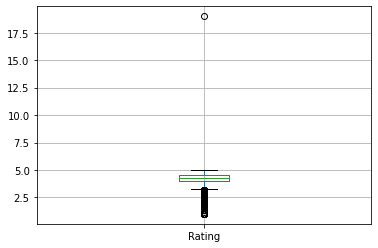

In [ ]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1906febe50>]],
      dtype=object)

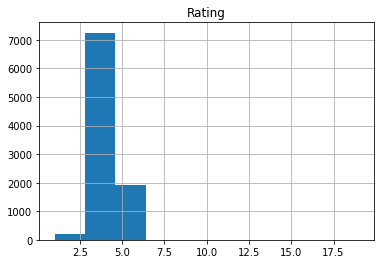

In [ ]:
df.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Checking the Null Value

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Checking the unexpected rating 

In [ ]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Droping the rating column no. 10472

In [ ]:
df.drop([10472],inplace=True)

In [ ]:
df[10465:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


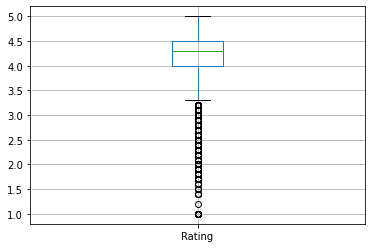

In [ ]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a8125e250>]],
      dtype=object)

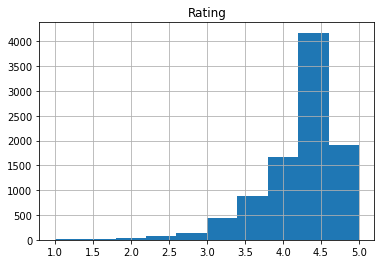

In [ ]:
df.hist()

Remove columns that are 90% empty

In [ ]:
threshold = len(df)* 0.1
threshold

1084.0

In [ ]:
df.dropna(thresh=threshold, axis=1, inplace=True)

Filling the null values with appropriate values using aggregate functions such as mean, median or mode.

In [ ]:
#Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())

In [ ]:
df.Rating = df['Rating'].transform(impute_median) 

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
# modes of categorical values
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
# Fill the missing categorical values with mode
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace=True)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Cleaning** **the** **Dataset**

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
#converting Price, Reviews and Ratings into Numerical Values
remove = ['+', ',', '$']
from_col = ['Installs', 'Price']
for i in from_col:
  for j in remove:
    df[i] = df[i].apply(lambda x: x.replace(j,''))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10840 non-null  object 
 12  Android_Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB
None


In [ ]:
#Changing datatype of installs from object to float
df['Installs'] = df['Installs'].astype(float)
#Similarly changing datatype of Price to float
df['Price'] = df['Price'].astype(float)
#Changing datatype of Reviews column from object to int
df['Reviews'] = pd.to_numeric(df['Reviews'], errors= 'coerce')
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


Data Visualization

In [ ]:
grp = df.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
a = grp['Installs'].agg(np.mean)
print(x)
print(y)
print(z)
print(a)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

Number of Categories are: 33


Text(0.5, 0, 'Categories')

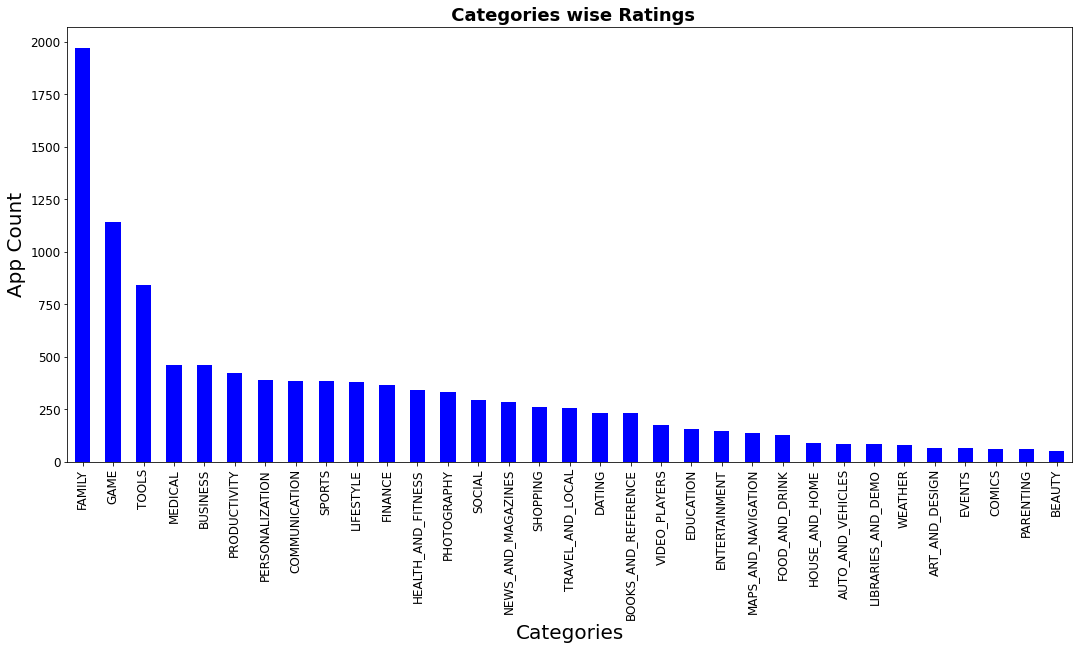

In [ ]:
#print total no. of categories
total_category = len(df['Category'].unique())
print("Number of Categories are:",total_category)
df.Category.value_counts().sort_values(ascending = False).plot(kind ='bar', figsize=(18,8), fontsize=12, color='blue')
plt.title(" Categories wise Ratings", fontsize=18,fontweight='bold')
plt.ylabel("App Count", size= 20)
plt.xlabel("Categories", size = 20)

It indicates that the most no. of apps are in Family category & least is in Beauty category

To find average app rating 

The average rating of apps: 4.206476014760287


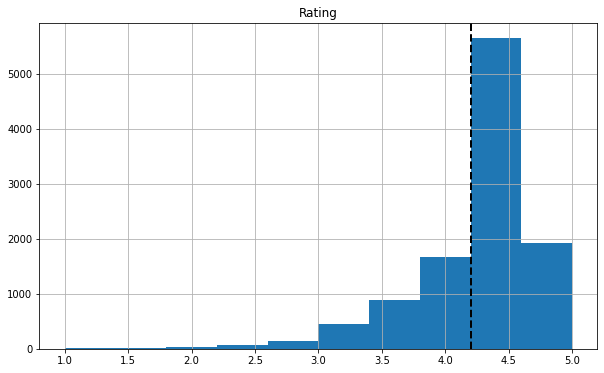

In [ ]:
avg_rate = df.Rating.mean()
print("The average rating of apps:",avg_rate)
df.hist('Rating', figsize=(10,6));
plt.axvline(avg_rate, linestyle='dashed', linewidth=2, color='black');

It shows the average app rating is 4.2

**Now check some comparison between for the apps** 

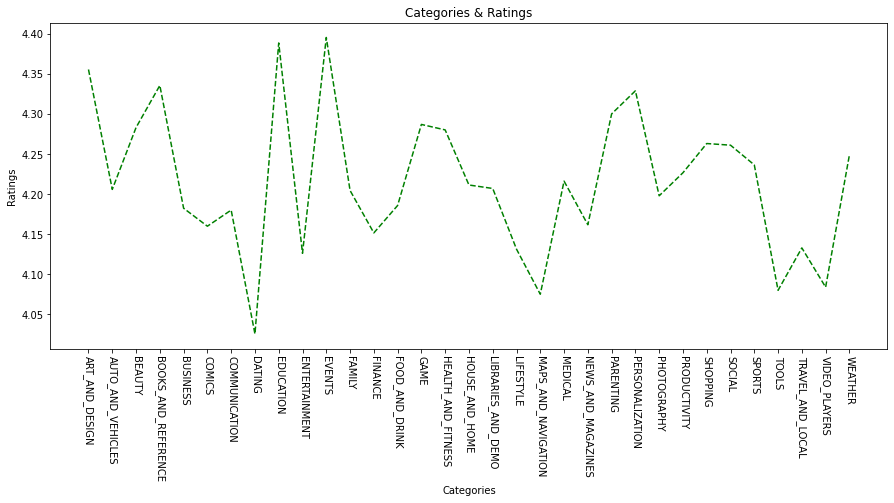

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(x, "r--", color='green')
plt.xticks(rotation=270)
plt.title('Categories & Ratings')
plt.xlabel("Categories")
plt.ylabel("Ratings")
plt.show()

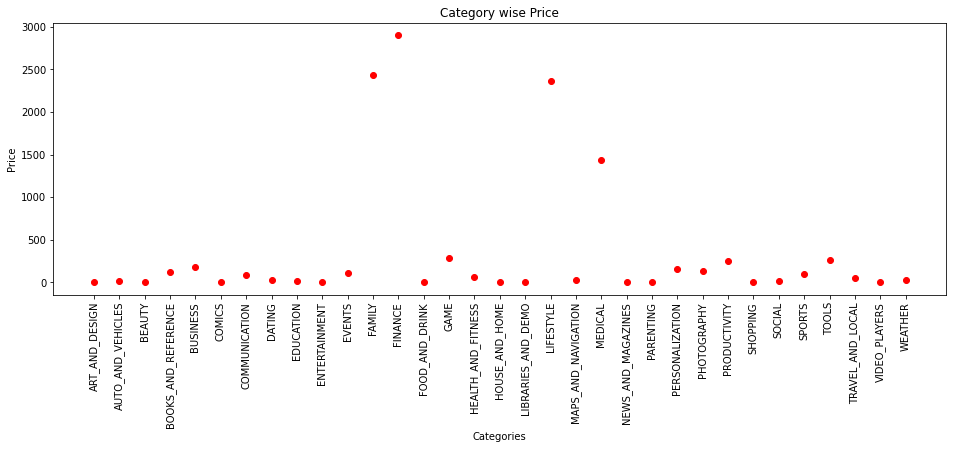

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(y,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Price')
plt.xlabel('Categories')
plt.ylabel('Price')
plt.show()

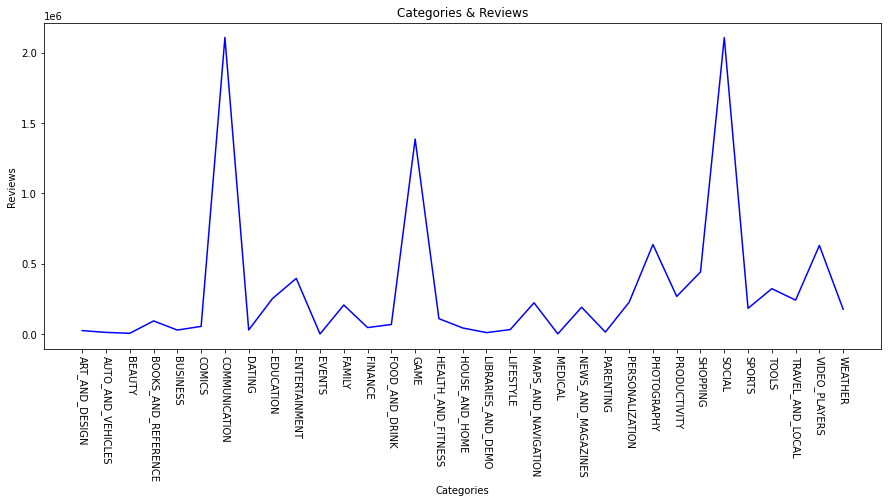

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(z, color='blue')
plt.xticks(rotation=270)
plt.title('Categories & Reviews')
plt.xlabel("Categories")
plt.ylabel("Reviews")
plt.show()

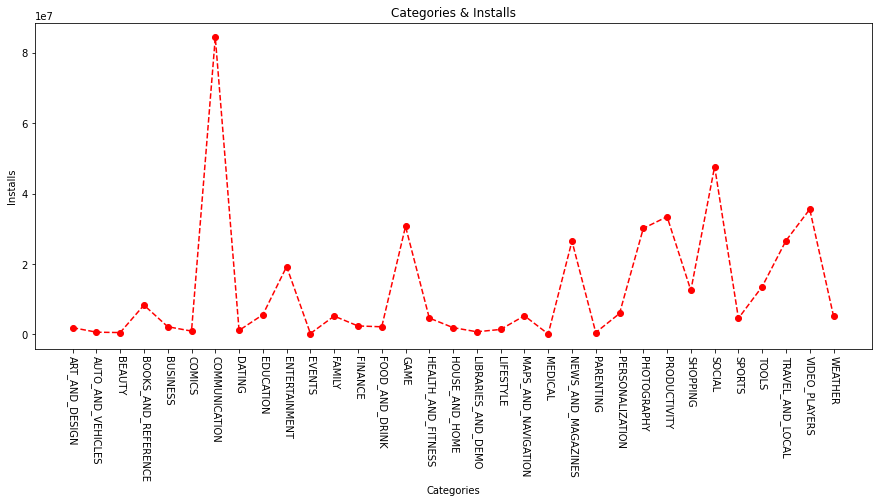

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(a, 'ro--' , color='red')
plt.xticks(rotation=270)
plt.title('Categories & Installs')
plt.xlabel("Categories")
plt.ylabel("Installs")
plt.show()

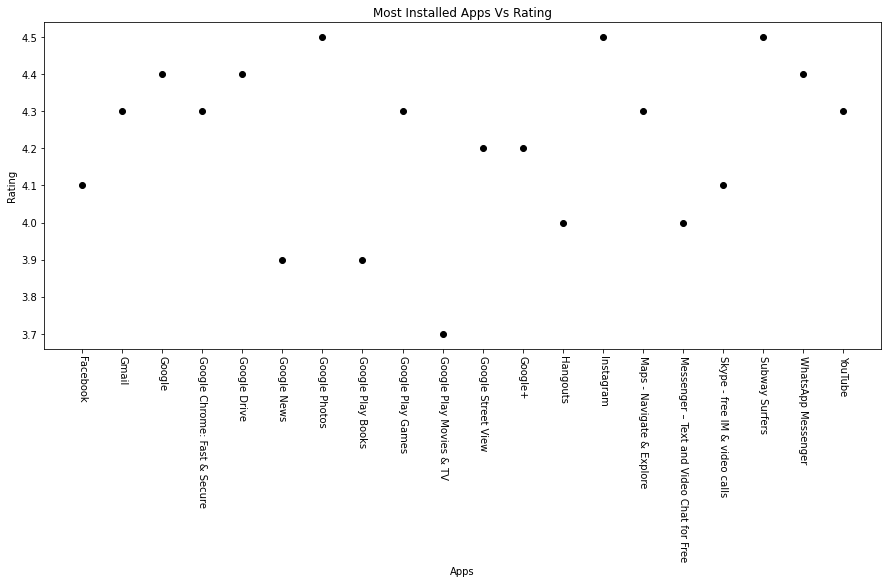

Total Number of most installed apps: 58


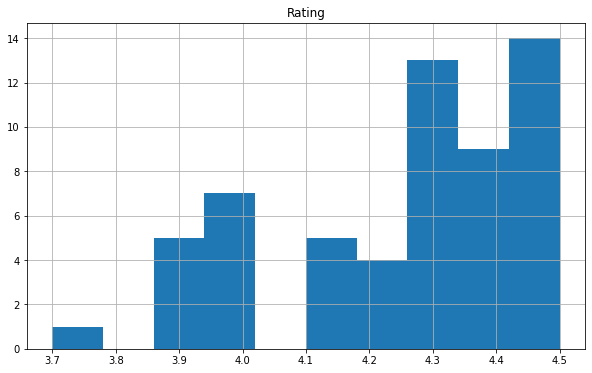

In [ ]:
#Check which app is most installed
most_install =df[df['Installs'].max()==df['Installs']][['App', 'Rating']]
grp = most_install.groupby('App')['Rating'].agg(np.mean)
plt.figure(figsize=(15,6))
plt.plot(grp, 'ro', color='black')
plt.xticks(rotation=270)
plt.title('Most Installed Apps Vs Rating')
plt.xlabel("Apps")
plt.ylabel("Rating")
plt.show()
most_install.hist('Rating', figsize=(10,6))
print('Total Number of most installed apps:',len(most_install))

Total Number of Apps having 5 star Rating: 274


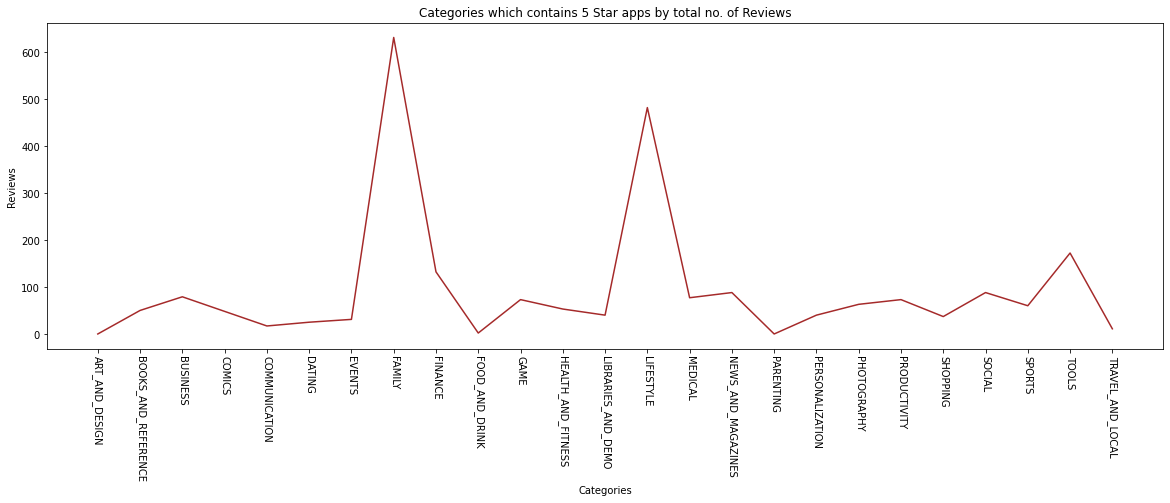

In [ ]:
#Check how many apps have 5 stars rating
print('Total Number of Apps having 5 star Rating:',len(df[df['Rating'].max()==df['Rating']]))
Reviewed_popular = (df[df['Rating'].max()==df['Rating']])[['App','Category', 'Reviews']]
gor = Reviewed_popular.groupby('Category')['Reviews'].agg(np.sum)
plt.figure(figsize=(20,6))
plt.plot(gor, 'r', color='brown')
plt.xticks(rotation=270)
plt.title('Categories which contains 5 Star apps by total no. of Reviews')
plt.xlabel("Categories")
plt.ylabel("Reviews")
plt.show()

Type
Free    4.201175
Paid    4.273000
Name: Rating, dtype: float64

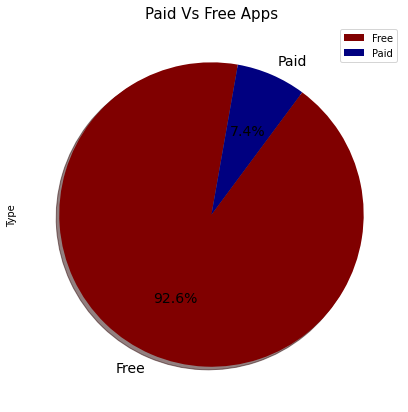

In [ ]:
df['Type'].value_counts().plot(kind = 'pie', fontsize=14, autopct='%.1f%%', figsize=(12,7), shadow=True, startangle=80, legend=True, cmap='jet_r')
plt.title('Paid Vs Free Apps', fontsize=15);
#Average Rating of Free and Paid Apps
df.groupby('Type')['Rating'].mean()

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


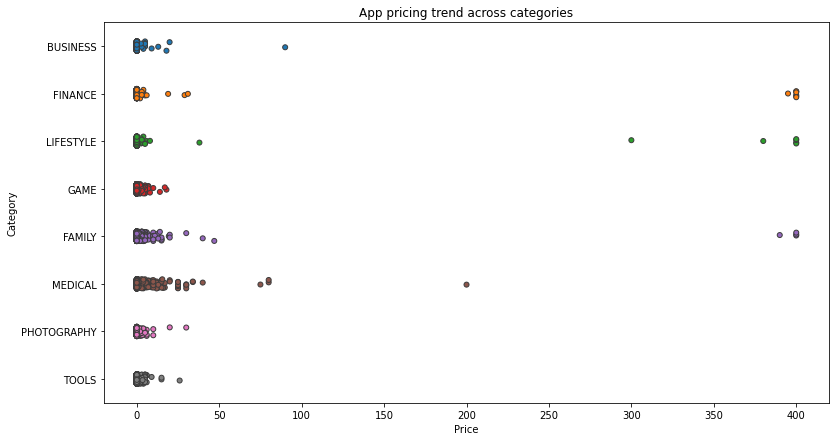

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

# Select a few popular app categories
popular_app_cats = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE', 'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

In [ ]:
df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.063166,0.045496,-0.019318
Reviews,0.063166,1.000000,0.643122,-0.009667
Installs,0.045496,0.643122,1.000000,-0.011689
Price,-0.019318,-0.009667,-0.011689,1.000000


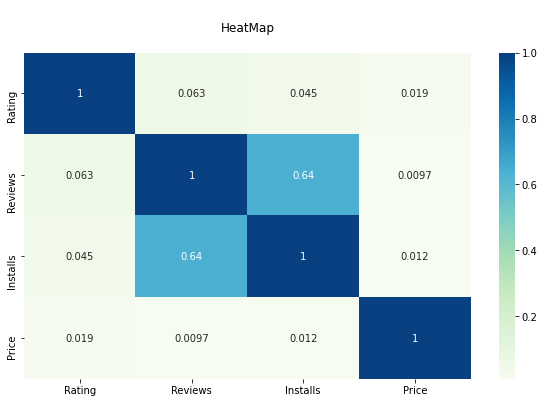

In [ ]:
plt.figure(figsize= (10,6))
plt.title("\nHeatMap\n")
sns.heatmap(abs(df.corr()), cmap='GnBu', annot=True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


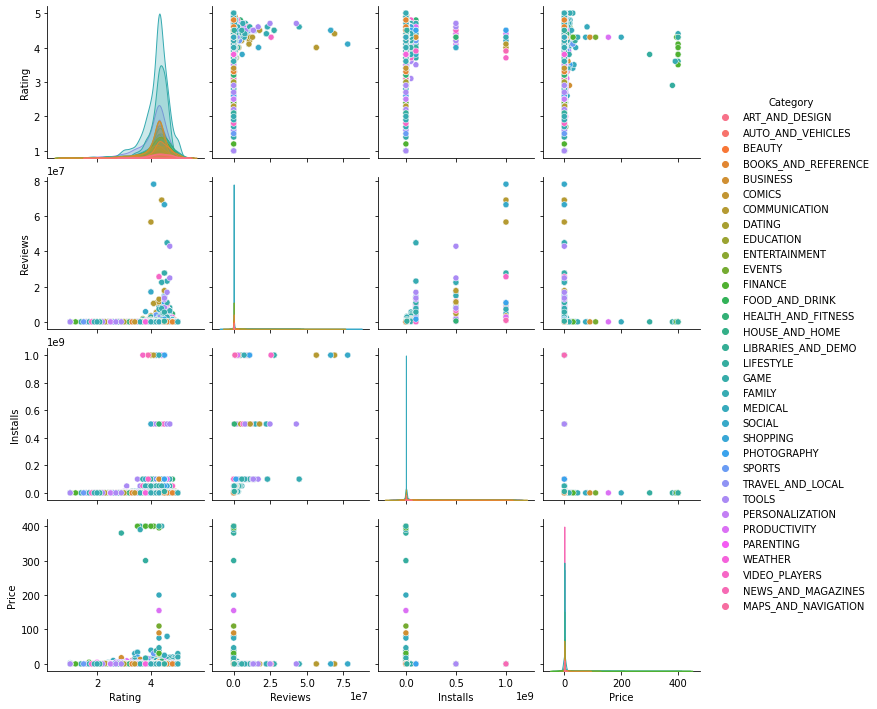

In [ ]:
sns.pairplot(df, hue='Category');